In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno 
from wordcloud import WordCloud

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor



def MissingDataPlot(df):
    '''
    plot missing data.
        1. bar
        2. matrix
    '''
    fig = plt.figure(figsize=((25, 10)))
    font = 12
    for i in range(1,3):
        ax1 = fig.add_subplot(1,2,1)
        missingno.bar(df,color=(0.0, 0.70, 1.00),fontsize=font,ax=ax1)
        ax2 = fig.add_subplot(1,2,2)
        missingno.matrix(df,color=(0.0, 0.70, 1.00),fontsize=font,ax=ax2)
    return plt.tight_layout()

def vis_cat_f(dataset:pd.DataFrame, col:str):
    fig = plt.figure(figsize=((25, 10)))
    colors = sns.color_palette('pastel')[0:5]
    p = dataset[col].value_counts()
    labels = p.index
    data = p.values
    ax1 = fig.add_subplot(1,2,1)
    ax1.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
    ax2 = fig.add_subplot(1,2,2)
    text = ' '.join(list(dataset[col]))
    wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

    ax2.imshow(wordcloud, interpolation='bilinear')
    ax2.axis("off")
    ax2.margins(x=0, y=0)
    pass

def plot_bar(dataset:pd.DataFrame, col:str):
    plt.figure(figsize=(14, 10))

    return sns.barplot(
            y="price", 
            x=col, 
            data=train, 
            estimator=sum, 
            ci=None, 
            color='#69b3a2')

In [35]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [36]:
for i in [train, test]:
    display(i.info())
    print('\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43040 non-null  int64  
 1   carat       43040 non-null  float64
 2   cut         43040 non-null  object 
 3   color       43040 non-null  object 
 4   clarity     43040 non-null  object 
 5   depth       43040 non-null  float64
 6   table       43040 non-null  float64
 7   price       43040 non-null  int64  
 8   x           43040 non-null  float64
 9   y           43040 non-null  float64
 10  z           43040 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


None




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10900 entries, 0 to 10899
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10900 non-null  int64  
 1   carat       10900 non-null  float64
 2   cut         10900 non-null  object 
 3   color       10900 non-null  object 
 4   clarity     10900 non-null  object 
 5   depth       10900 non-null  float64
 6   table       10900 non-null  float64
 7   x           10900 non-null  float64
 8   y           10900 non-null  float64
 9   z           10900 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 851.7+ KB


None

C:\Users\ASUS\OneDrive\Desktop\Barmj project\Diamond-SHAI_For_AI-project\venv\lib\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


None

None

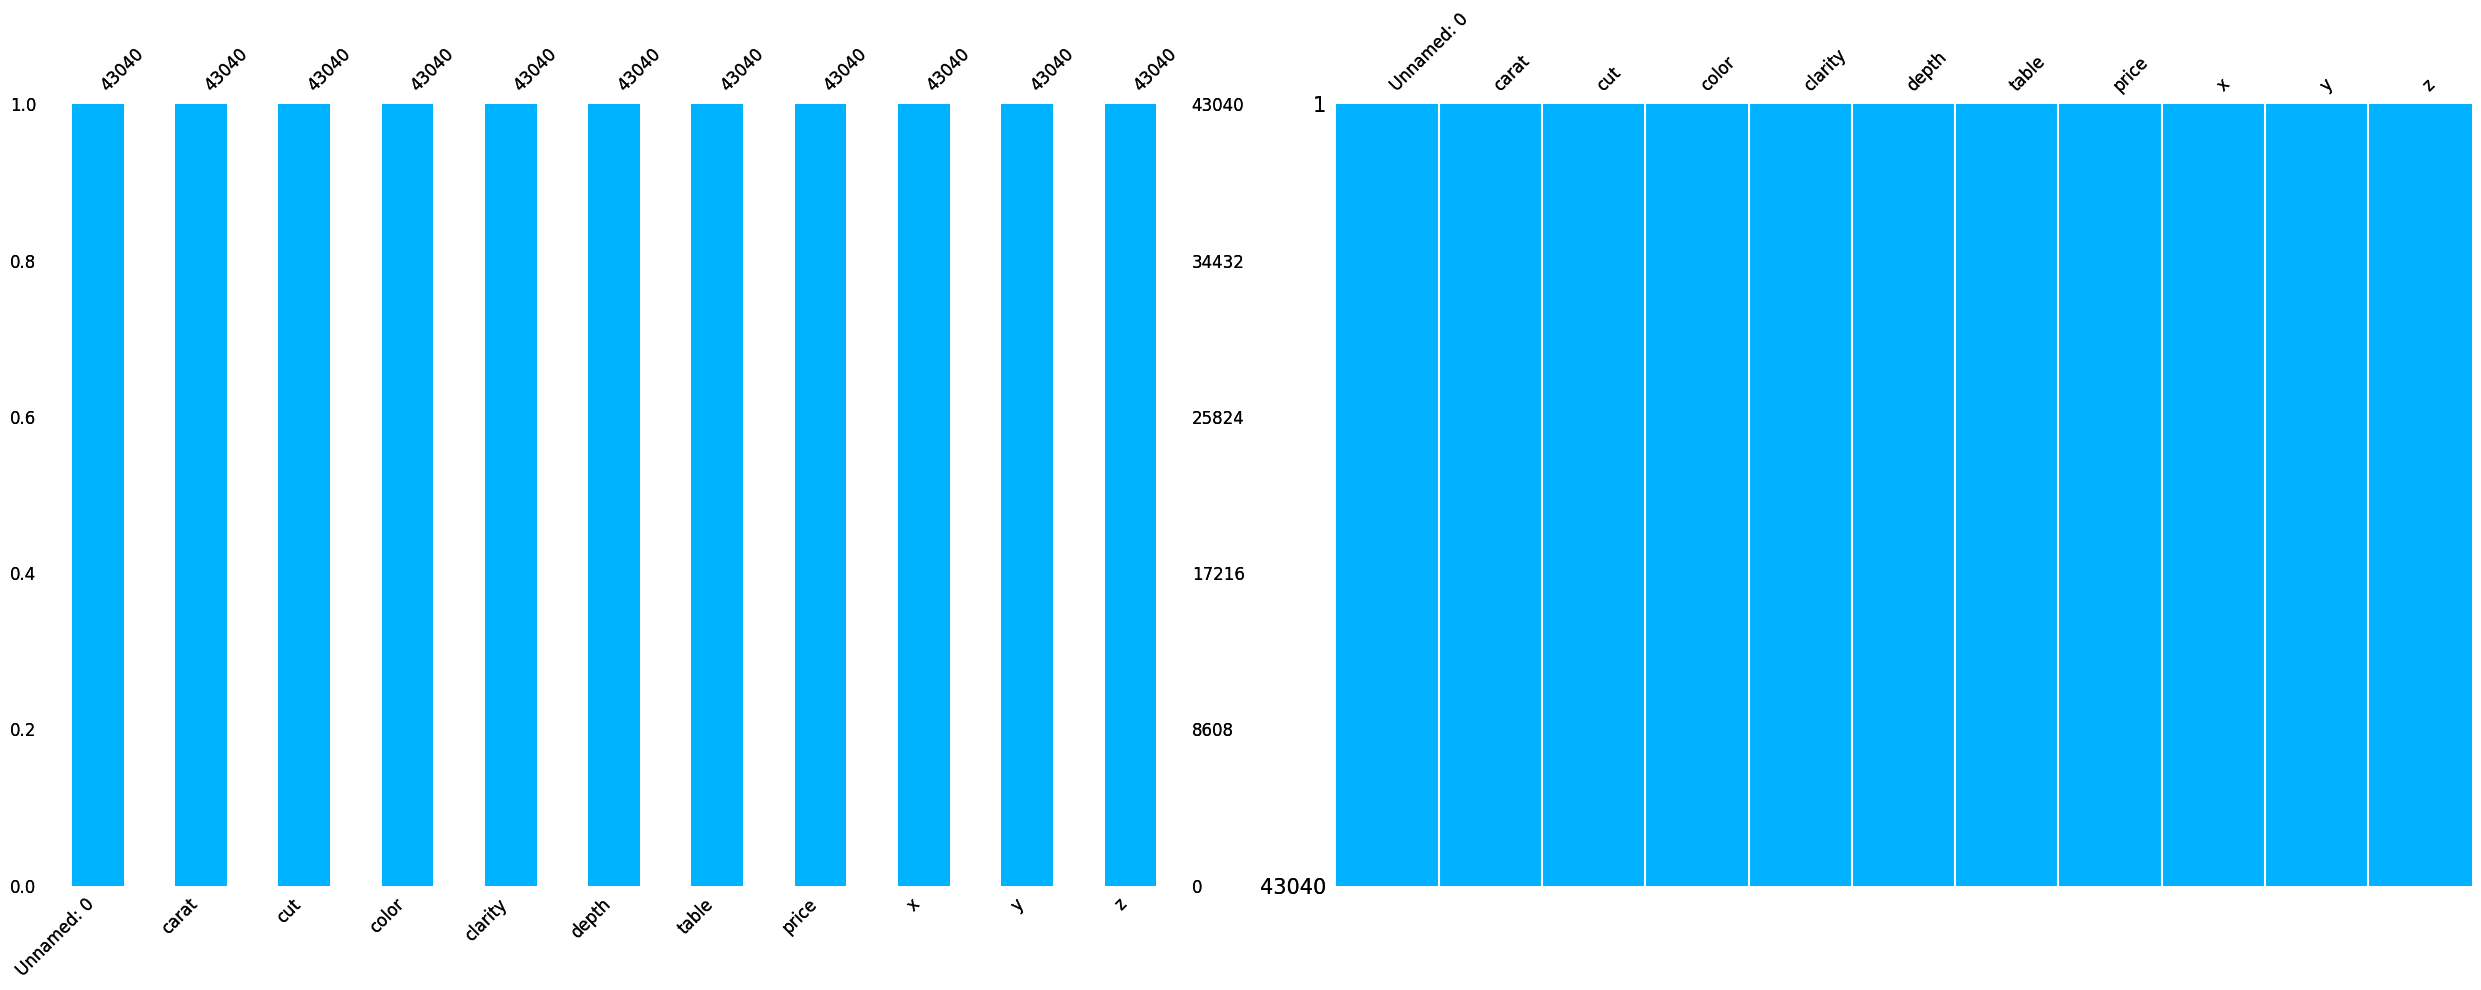

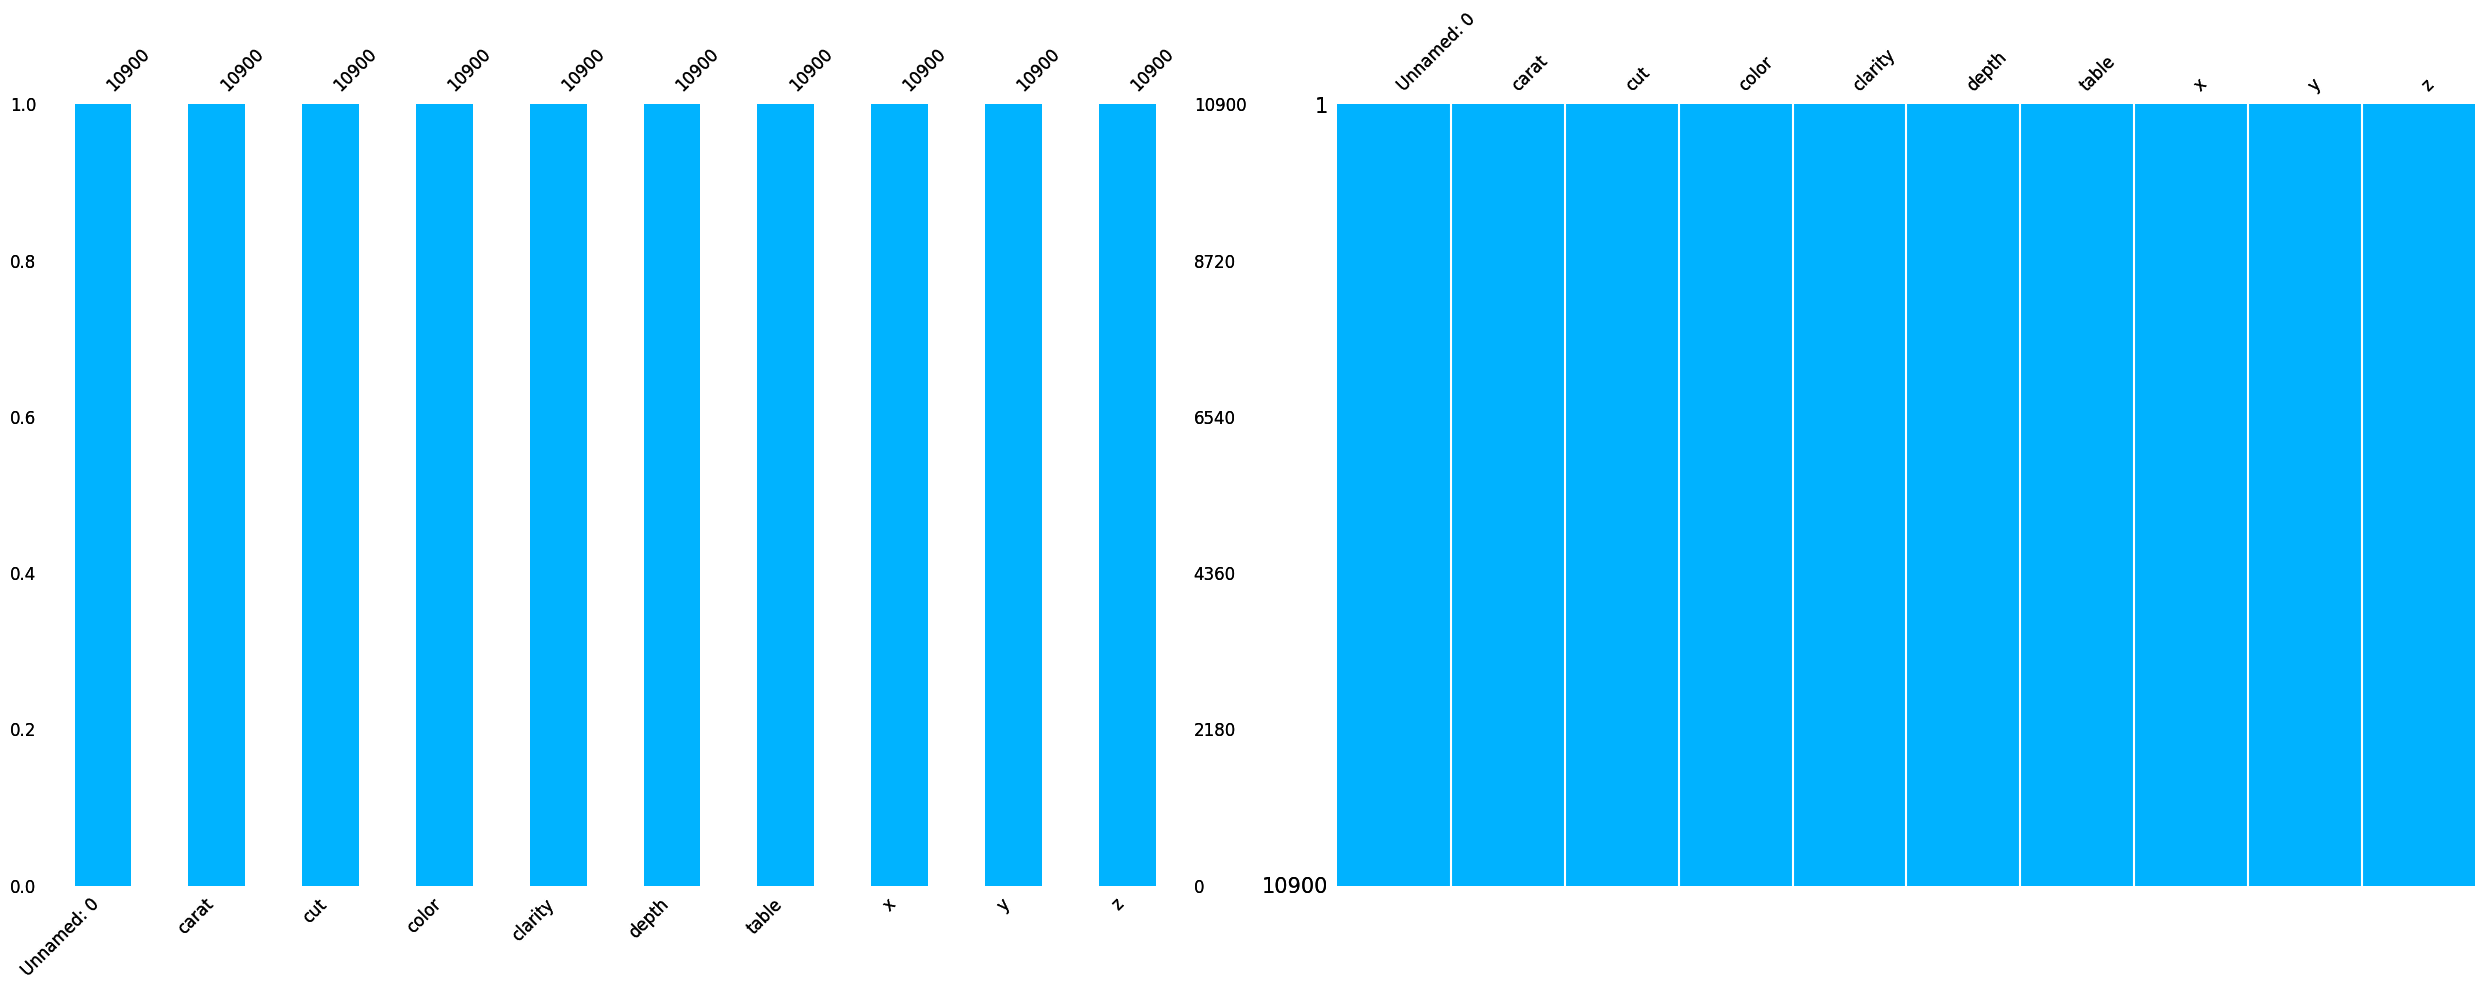

In [37]:
MissingDataPlot_train = display(MissingDataPlot(train));
MissingDataPlot_test = display(MissingDataPlot(test));

None

None

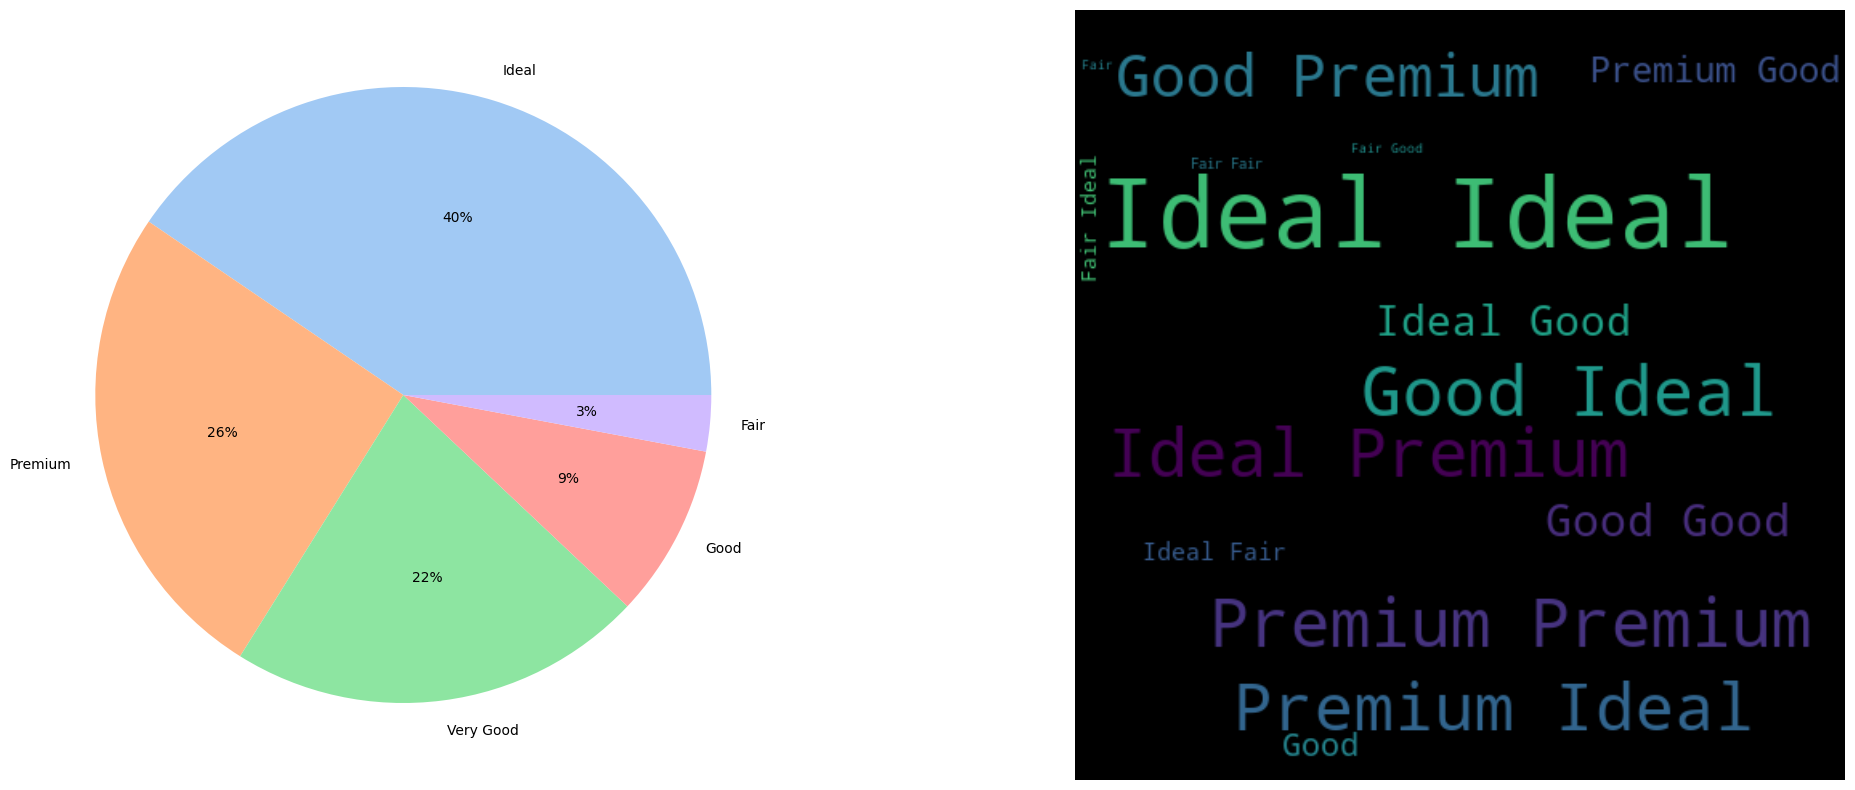

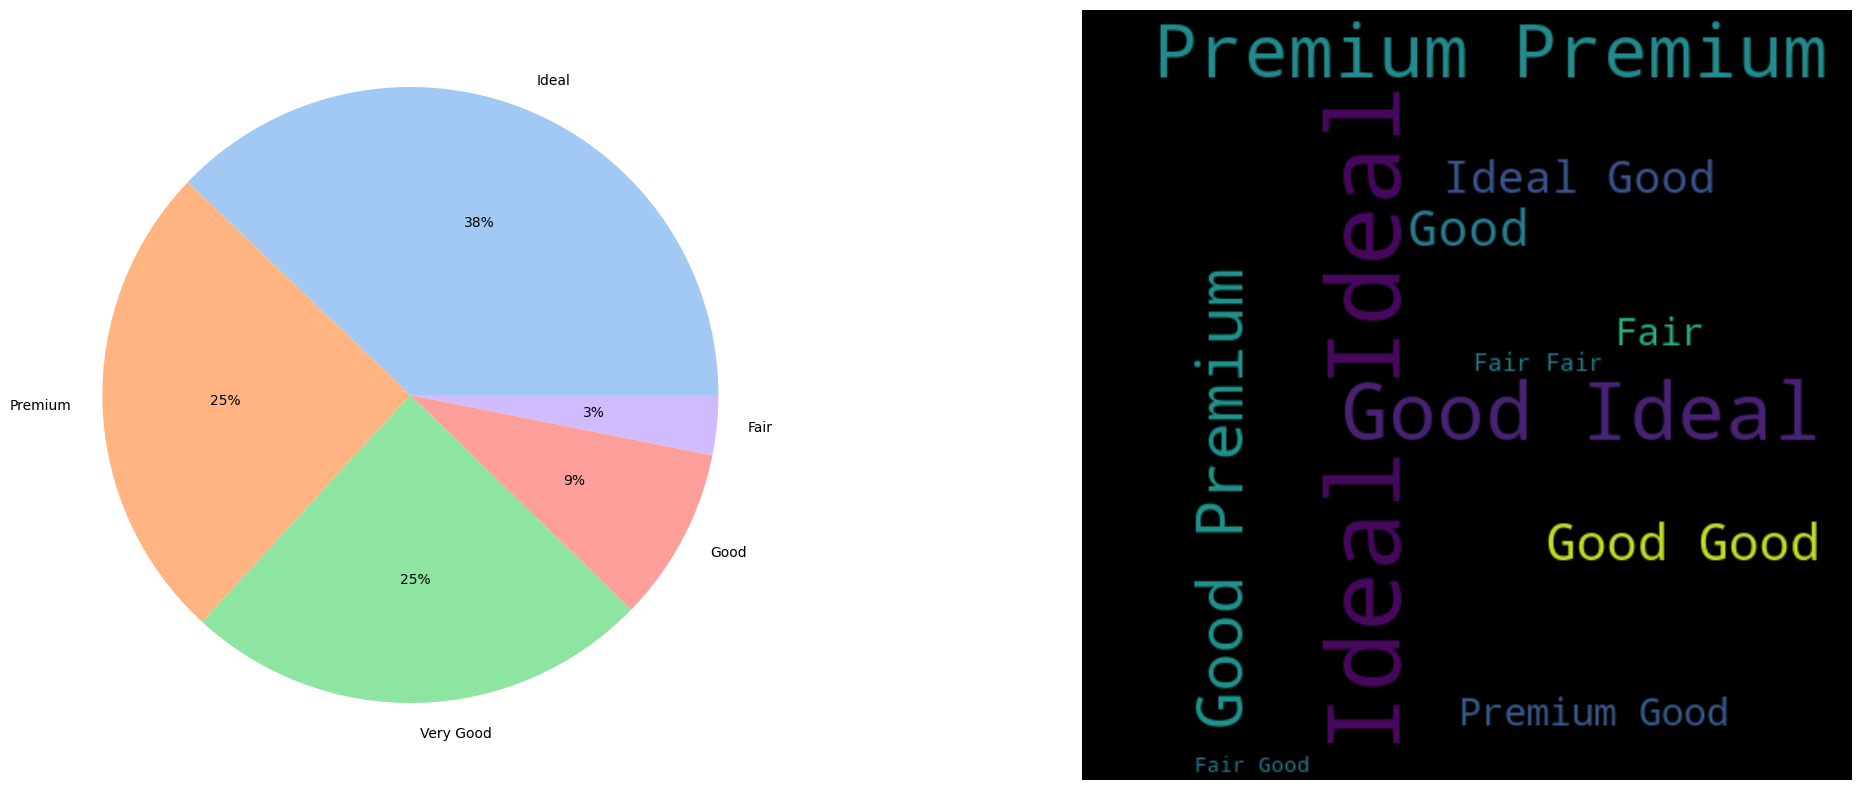

In [39]:
display(vis_cat_f(train, 'cut'));
display(vis_cat_f(test, 'cut'));

None

None

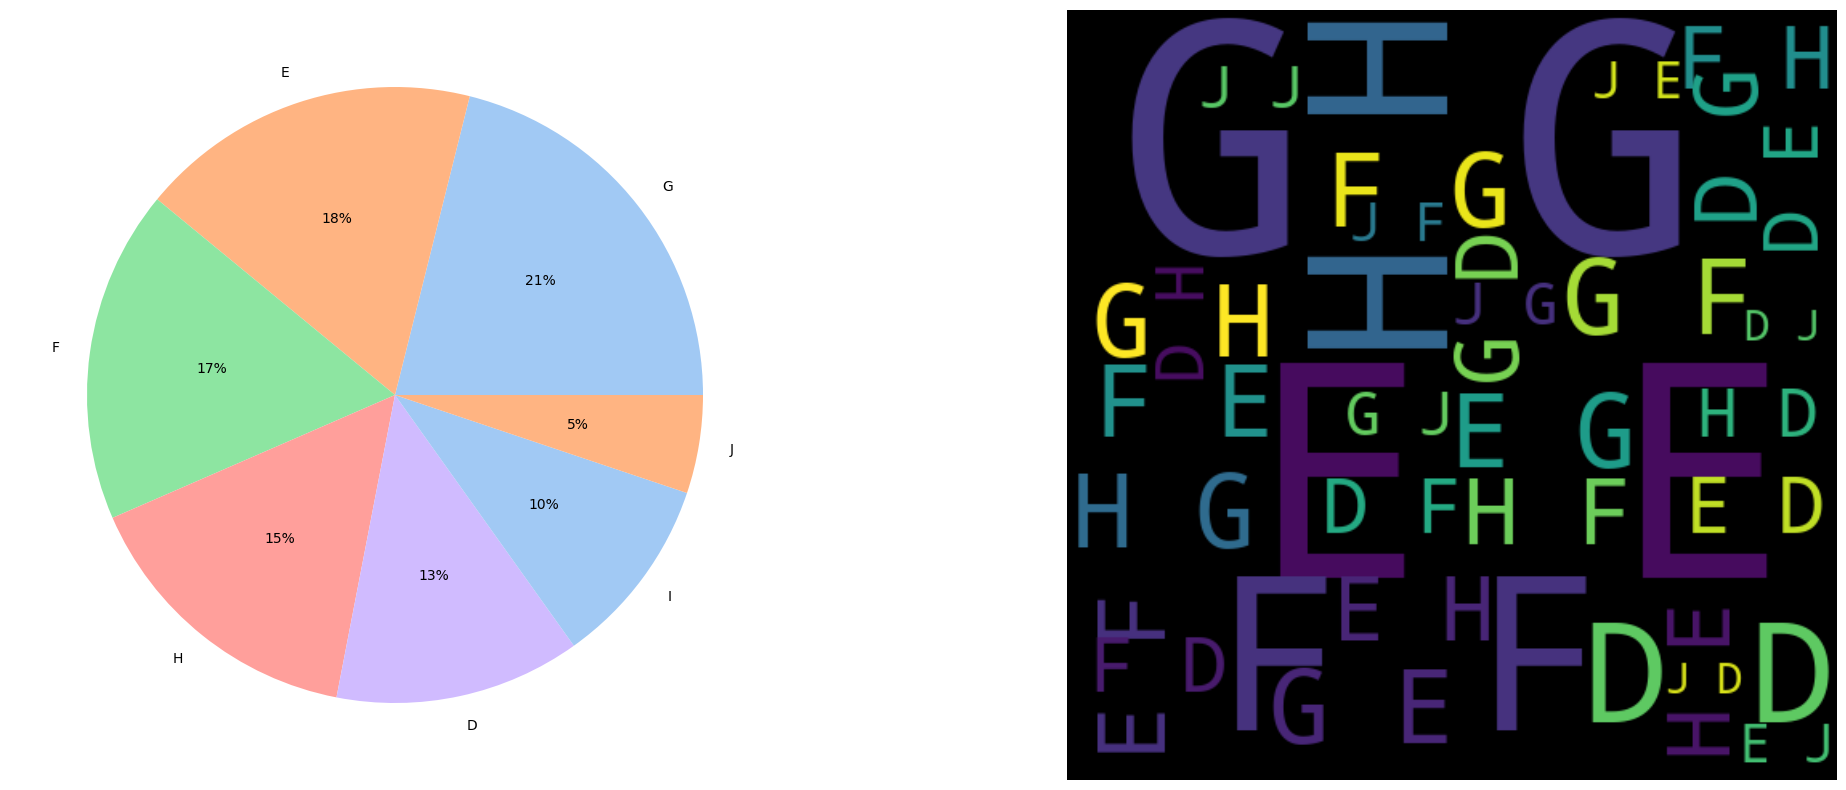

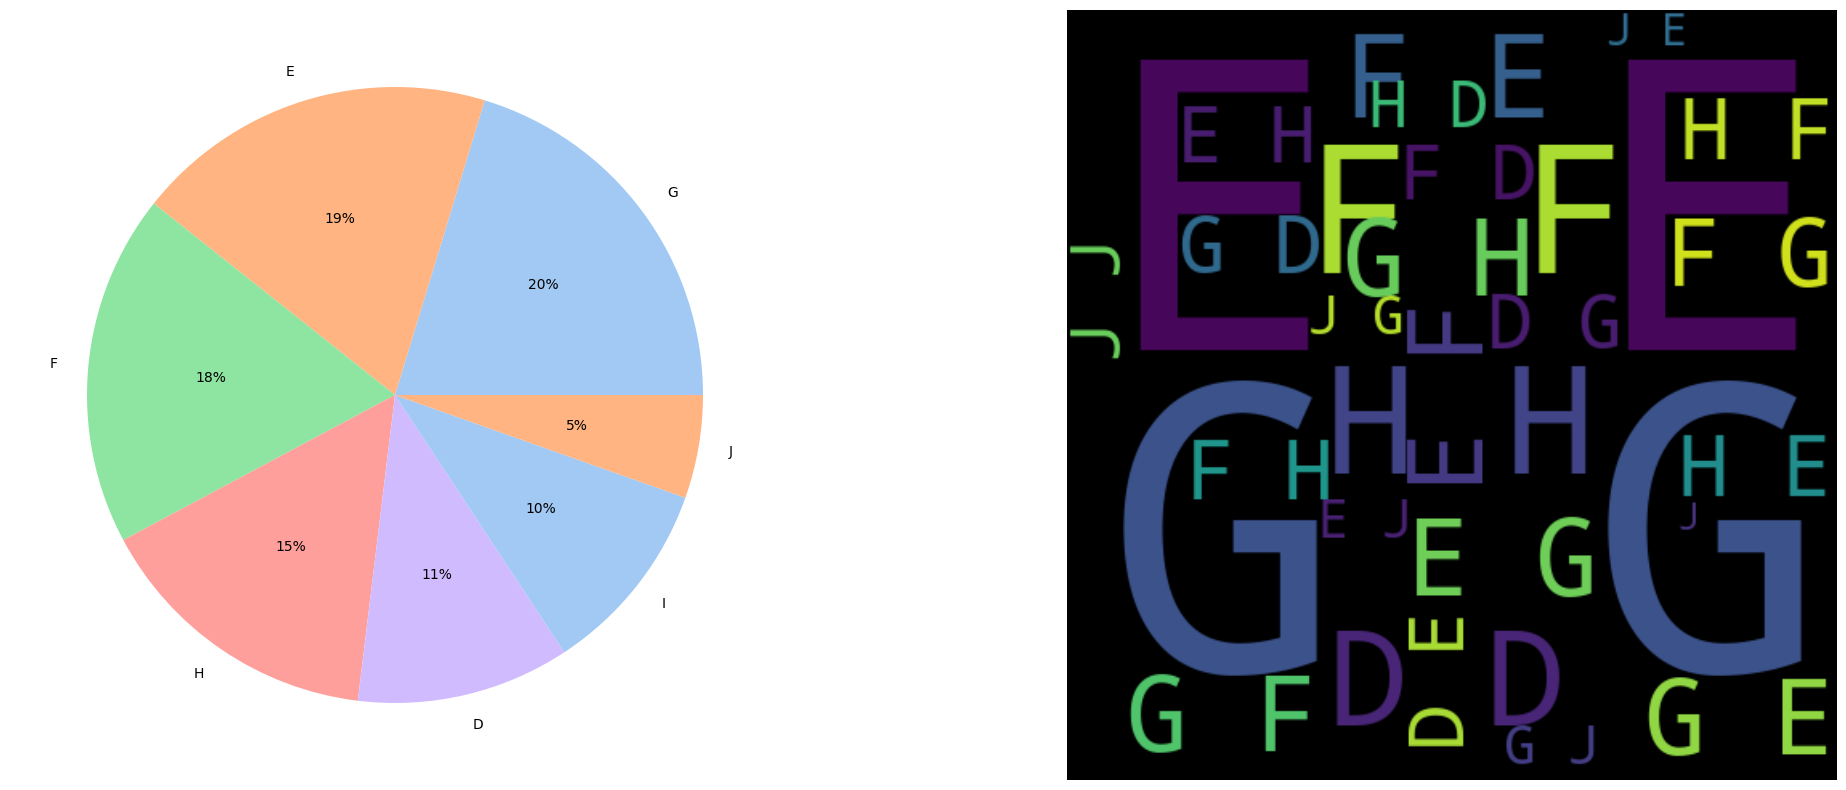

In [40]:
display(vis_cat_f(train, 'color'));
display(vis_cat_f(test, 'color'));

None

None

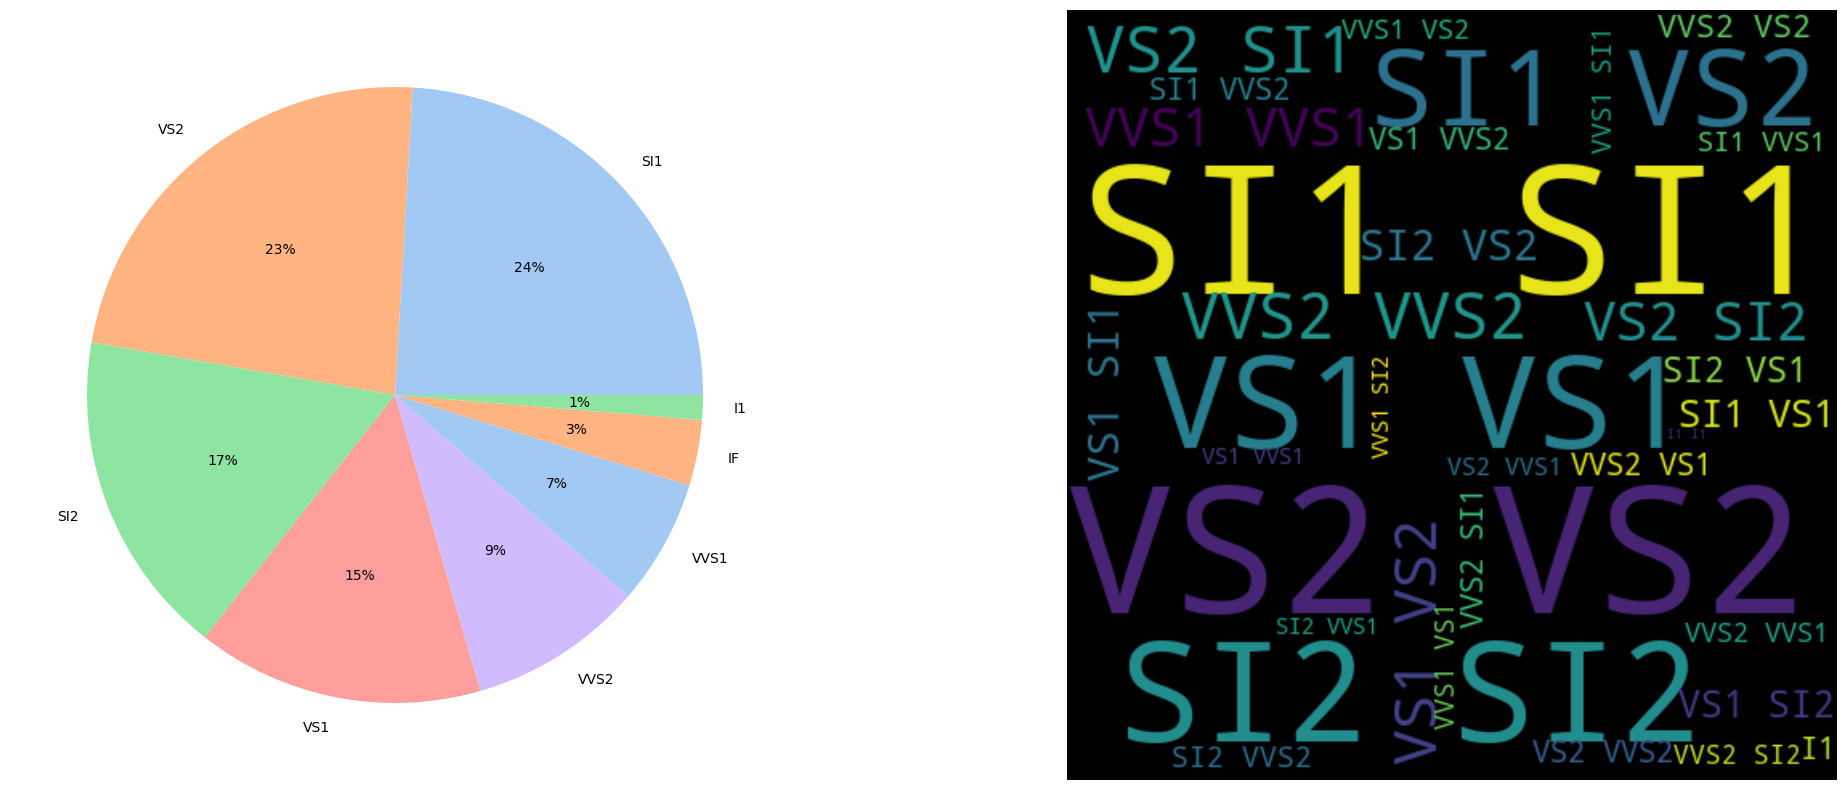

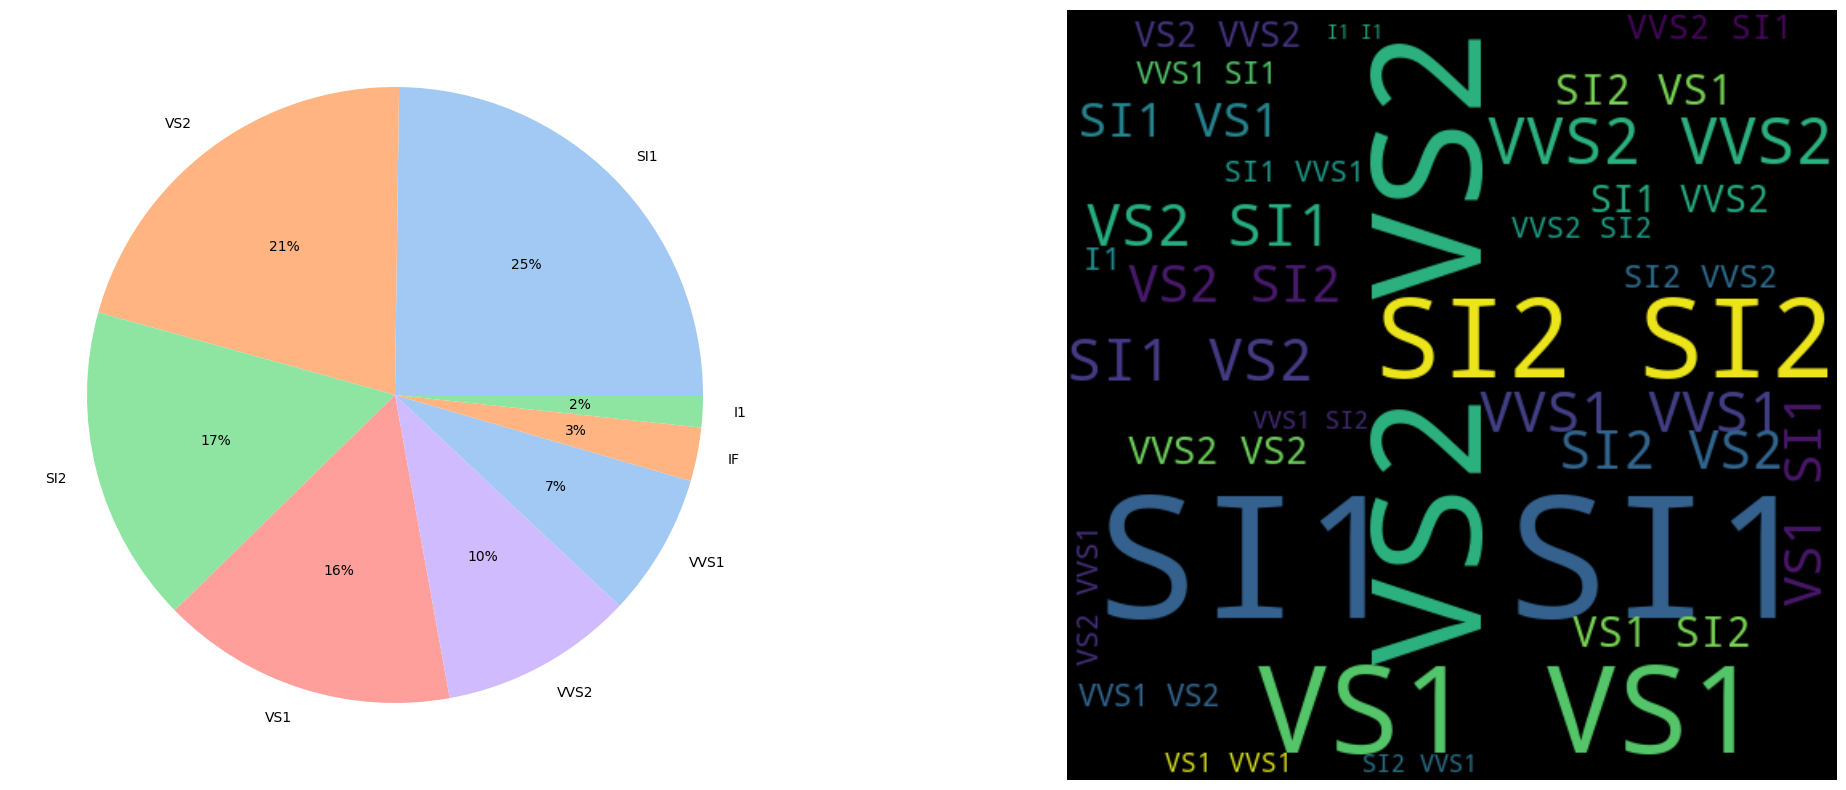

In [41]:
display(vis_cat_f(train, 'clarity'));
display(vis_cat_f(test, 'clarity'));

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25184\3160258386.py:51: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  return sns.barplot(


<AxesSubplot: xlabel='clarity', ylabel='price'>

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25184\3160258386.py:51: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  return sns.barplot(


<AxesSubplot: xlabel='clarity', ylabel='price'>

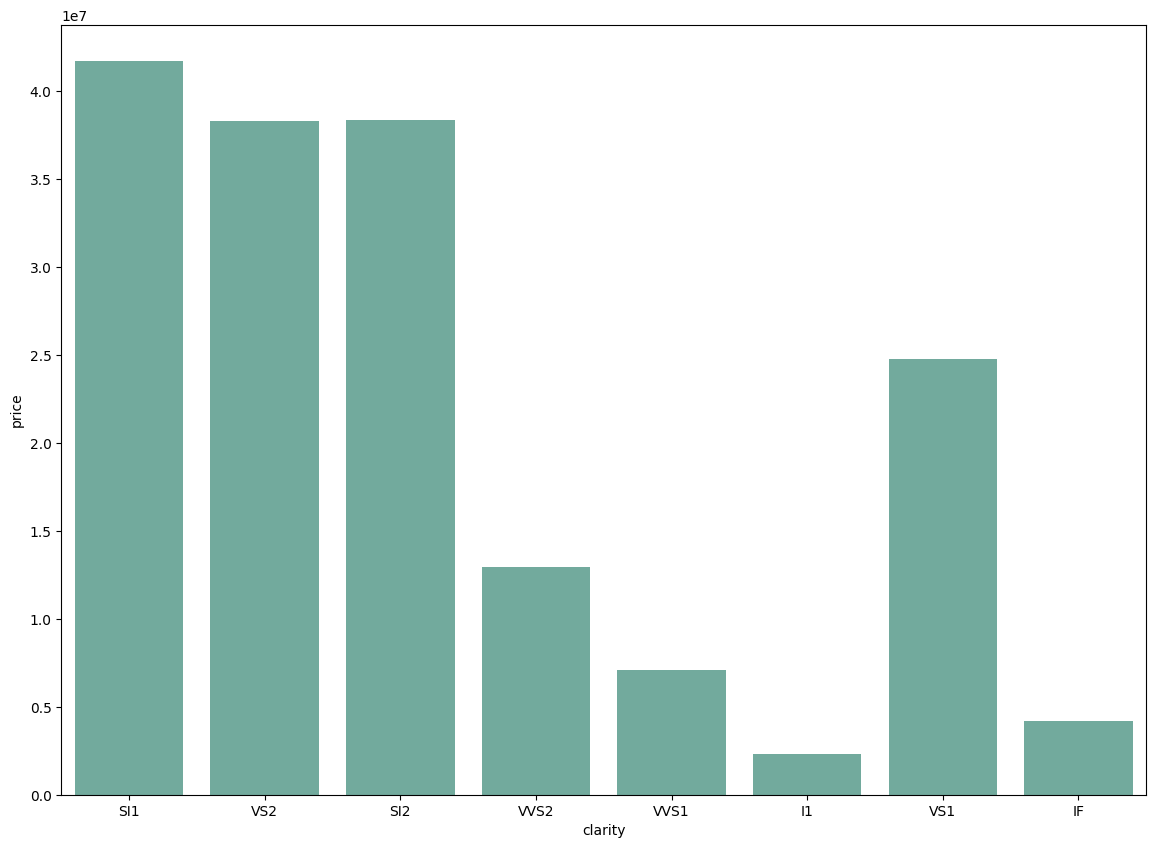

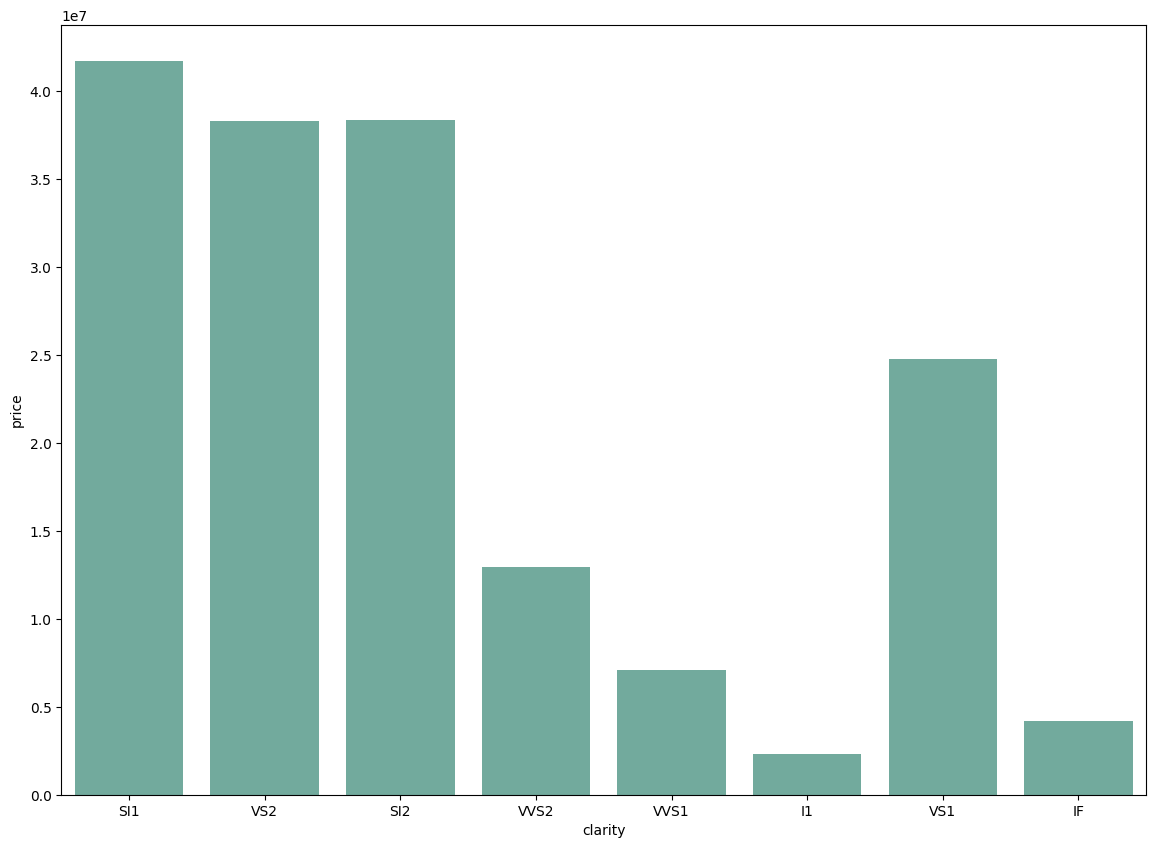

In [45]:
display(plot_bar(train, 'clarity'));
display(plot_bar(test, 'clarity'));

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25184\3160258386.py:51: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  return sns.barplot(


<AxesSubplot: xlabel='cut', ylabel='price'>

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25184\3160258386.py:51: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  return sns.barplot(


<AxesSubplot: xlabel='cut', ylabel='price'>

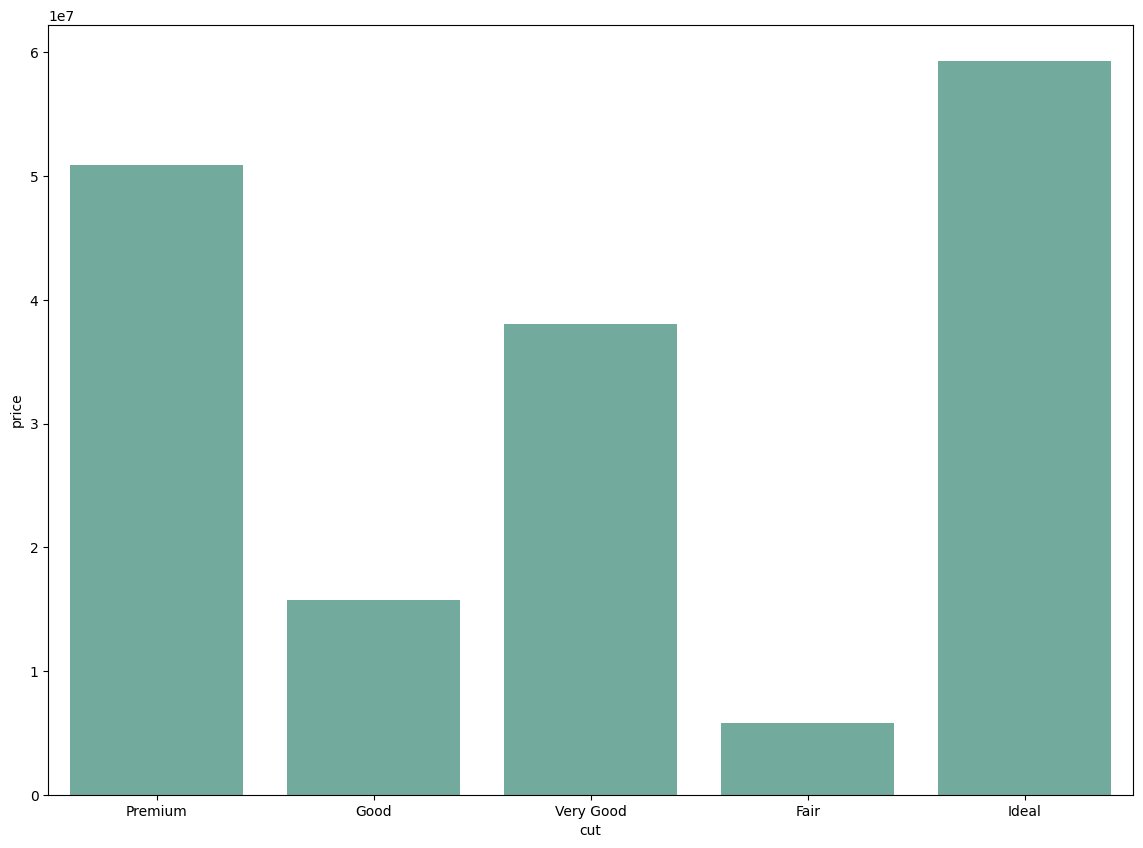

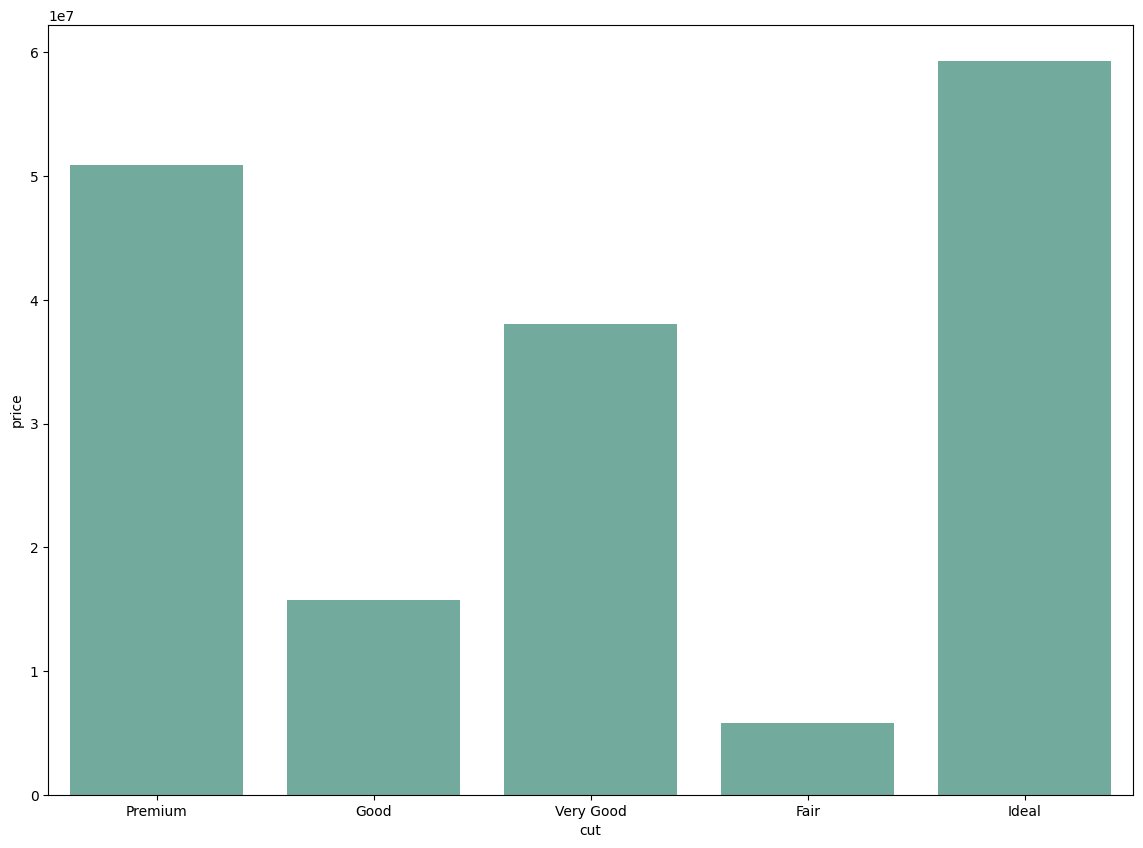

In [46]:
display(plot_bar(train, 'cut'));
display(plot_bar(test, 'cut'));

<AxesSubplot: xlabel='cut', ylabel='price'>

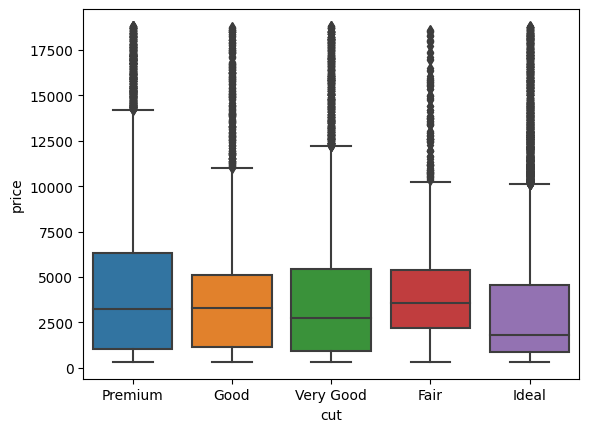

In [11]:
sns.boxplot( x=train["cut"], y=train["price"] )

<AxesSubplot: xlabel='color', ylabel='price'>

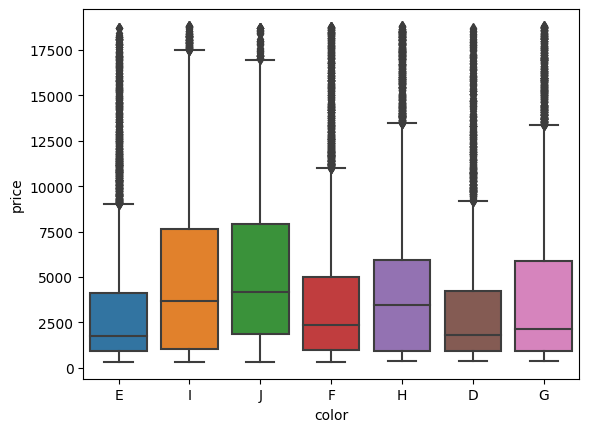

In [12]:
sns.boxplot( x=train["color"], y=train["price"] )

<AxesSubplot: xlabel='clarity', ylabel='price'>

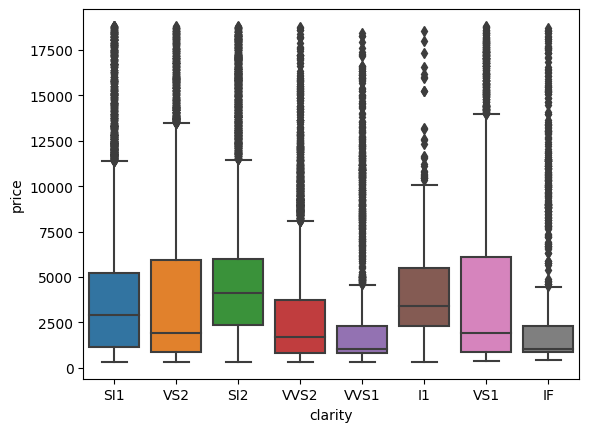

In [13]:
sns.boxplot( x=train["clarity"], y=train["price"] )

In [48]:
train_num = train.select_dtypes(['float64','int64'])
train_obj =  train.select_dtypes('object')
test_num = test.select_dtypes(['float64','int64'])
test_obj =  test.select_dtypes('object')

In [51]:
display(train_num.describe())
display(test_num.describe())

,Unnamed: 0,carat,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,26758.804554,0.796964,61.746080,57.439542,3942.706343,5.724376,5.728122,3.534367
std,15484.904515,0.481455,1.435246,2.240196,4023.534556,1.132496,1.159641,0.714543
min,2.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13326.750000,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,26824.500000,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,40290.250000,1.030000,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


,Unnamed: 0,carat,depth,table,x,y,z
count,10900.000000,10900.000000,10900.000000,10900.000000,10900.000000,10900.000000,10900.000000
mean,27806.405688,0.801794,61.762532,57.526844,5.757932,5.759811,3.555975
std,15880.940837,0.443401,1.422198,2.210543,1.077961,1.069891,0.669389
min,1.000000,0.230000,52.200000,50.100000,0.000000,0.000000,0.000000
25%,14044.500000,0.410000,61.000000,56.000000,4.790000,4.800000,2.970000
50%,27911.500000,0.700000,61.900000,57.000000,5.680000,5.690000,3.520000
75%,40898.250000,1.130000,62.600000,59.000000,6.700000,6.690000,4.130000
max,53938.000000,2.500000,71.600000,73.000000,8.800000,8.890000,5.580000


In [52]:
for i in [train_num, test_num]:
    i.replace(0,np.NaN,inplace=True)

C:\Users\ASUS\OneDrive\Desktop\Barmj project\Diamond-SHAI_For_AI-project\venv\lib\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


None

None

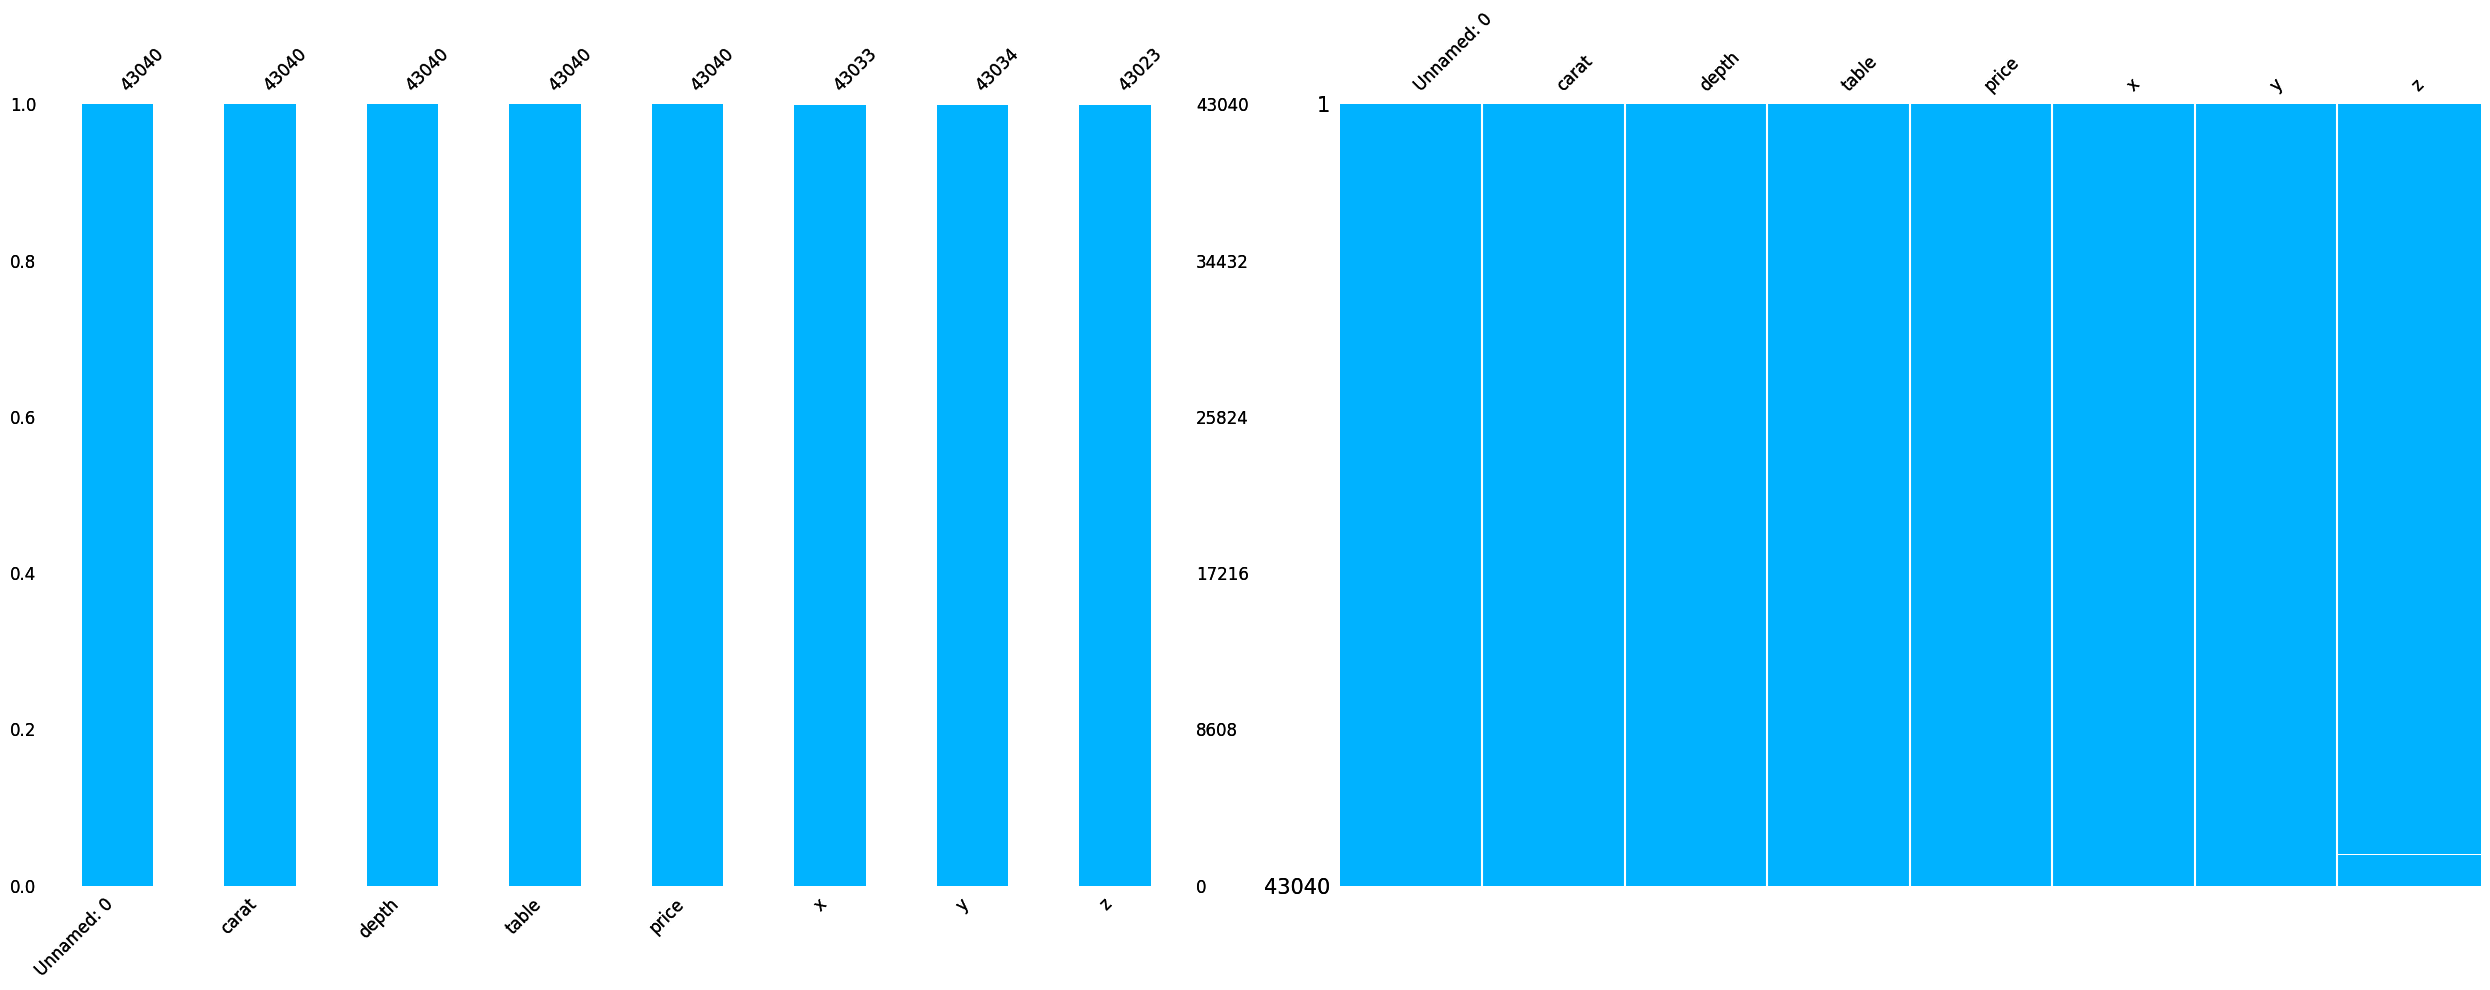

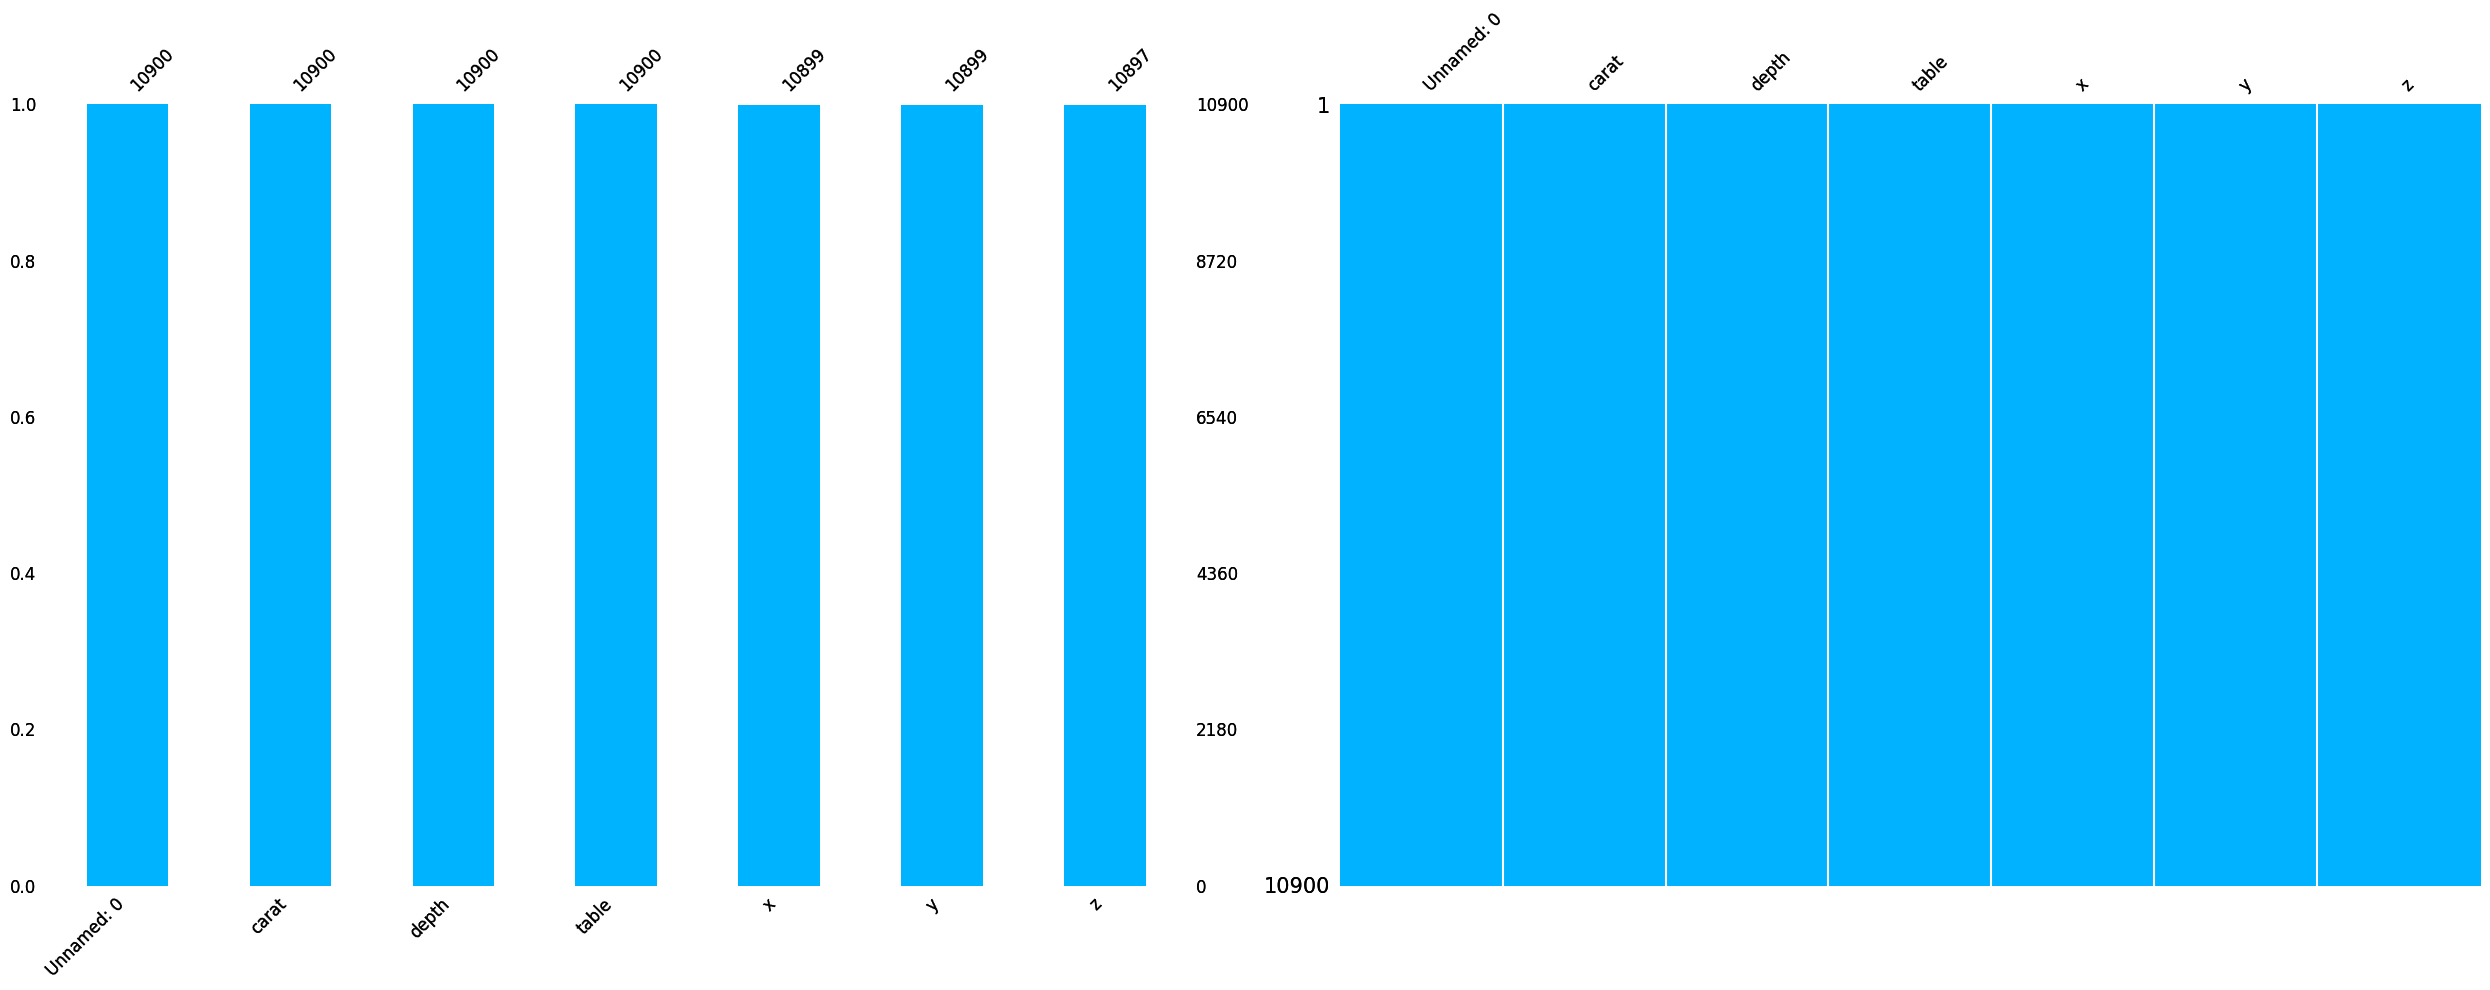

In [53]:
MissingDataPlot_train = display(MissingDataPlot(train_num));
MissingDataPlot_test = display(MissingDataPlot(test_num));

In [57]:
train_num.replace()

0        2.31
1        2.63
2        2.75
3        2.48
4        2.47
         ... 
43035    3.58
43036    3.50
43037    3.61
43038    3.74
43039    3.64
Name: z, Length: 43040, dtype: float64

In [123]:
def get_mean(data:list, f:list):
    new_data = data[0].append(data[1])[f]
    mean_list = []
    for i in f:
        mean_list.append(new_data[i].mean())
    return mean_list
x, y, z = get_mean([train_num, test_num] ,['x','y','z'])


def impute(data:pd.DataFrame, x:float, y:float, z:float):
    df1 = data.replace({"x":np.NaN},x)
    df1 = df1.replace({"y":np.NaN},y)
    df1 = df1.replace({"z":np.NaN},z)
    return df1

train_num = impute(train_num, x, y, z)
test_num = impute(test_num, x, y, z)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25184\4207737294.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = data[0].append(data[1])[f]


In [129]:
display(train_num.describe())
display(test_num.describe())

,Unnamed: 0,carat,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,26758.804554,0.796964,61.746080,57.439542,3942.706343,5.725309,5.728922,3.535766
std,15484.904515,0.481455,1.435246,2.240196,4023.534556,1.130140,1.157667,0.711081
min,2.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,13326.750000,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,26824.500000,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,40290.250000,1.030000,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


,Unnamed: 0,carat,depth,table,x,y,z
count,10900.000000,10900.000000,10900.000000,10900.000000,10900.000000,10900.000000,10900.000000
mean,27806.405688,0.801794,61.762532,57.526844,5.758458,5.760337,3.556950
std,15880.940837,0.443401,1.422198,2.210543,1.076549,1.068468,0.666784
min,1.000000,0.230000,52.200000,50.100000,3.830000,3.840000,2.310000
25%,14044.500000,0.410000,61.000000,56.000000,4.790000,4.800000,2.970000
50%,27911.500000,0.700000,61.900000,57.000000,5.680000,5.690000,3.520000
75%,40898.250000,1.130000,62.600000,59.000000,6.700000,6.690000,4.130000
max,53938.000000,2.500000,71.600000,73.000000,8.800000,8.890000,5.580000


In [130]:
train_obj_ord = train_obj[['cut','clarity']]
train_obj_no = train_obj[['color']]
test_obj_ord = test_obj[['cut','clarity']]
test_obj_no = test_obj[['color']]

In [131]:
ordinal_encoder = OrdinalEncoder(categories = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], 
                                              ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])
diamond_cat_encoded = ordinal_encoder.fit_transform(train_obj_ord)
train_obj_ord = pd.DataFrame(diamond_cat_encoded,columns=['cut','clarity'])
diamond_cat_encoded = ordinal_encoder.fit_transform(test_obj_ord)
test_obj_ord = pd.DataFrame(diamond_cat_encoded,columns=['cut','clarity'])

In [132]:
cat_encoder = OneHotEncoder()

train_obj_no = cat_encoder.fit_transform(train_obj_no)
train_obj_no = pd.DataFrame(train_obj_no.toarray(),dtype=np.float64,columns=['D', 'E', 'J', 'G', 'H' ,'I', 'J'])
test_obj_no = cat_encoder.fit_transform(test_obj_no)
test_obj_no = pd.DataFrame(test_obj_no.toarray(),dtype=np.float64,columns=['D', 'E', 'J', 'G', 'H' ,'I', 'J'])

In [133]:
train_processing = pd.concat([train_num,train_obj_ord,train_obj_no],axis=1)
display(train_processing.sample())
test_processing = pd.concat([test_num,test_obj_ord,test_obj_no],axis=1)
display(test_processing.sample())

,Unnamed: 0,carat,depth,table,price,x,y,z,cut,clarity,D,E,J,G,H,I,J
25802,31982,0.3,62.2,58.0,776,4.31,4.28,2.67,3.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


,Unnamed: 0,carat,depth,table,x,y,z,cut,clarity,D,E,J,G,H,I,J
8958,45909,0.7,65.0,56.0,5.6,5.5,3.61,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [134]:
train_processing["volume"] = train_processing["x"]*train_processing["y"]*train_processing["z"]
train_processing = train_processing.drop(['x', 'y', 'z'], axis=1)

test_processing["volume"] = test_processing["x"]*test_processing["y"]*test_processing["z"]
test_processing = test_processing.drop(['x', 'y', 'z'], axis=1)

In [135]:
display(train_processing.sample())
display(test_processing.sample())

,Unnamed: 0,carat,depth,table,price,cut,clarity,D,E,J,G,H,I,J,volume
11928,14793,1.09,60.2,61.0,5951,3.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,179.38044


,Unnamed: 0,carat,depth,table,cut,clarity,D,E,J,G,H,I,J,volume
8637,42975,0.41,62.2,58.0,3.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,67.0662


In [136]:
X_train = train_processing.drop(['price','Unnamed: 0'],axis=1)
y_train = train_processing['price']

In [137]:
test = test_processing.drop('Unnamed: 0',axis=1)

In [138]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 7]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  {'bootstrap': [True], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

In [139]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
    scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(X_train, y_train)
print("best parameters ",grid_search.best_params_)

best parameters  {'max_features': 7, 'n_estimators': 30}


In [140]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

2131.3801212290596 {'max_features': 2, 'n_estimators': 3}
2034.745471462997 {'max_features': 2, 'n_estimators': 10}
2021.2612939644487 {'max_features': 2, 'n_estimators': 30}
1986.6712526804488 {'max_features': 4, 'n_estimators': 3}
1959.278317486961 {'max_features': 4, 'n_estimators': 10}
1953.334399135806 {'max_features': 4, 'n_estimators': 30}
1951.5487868202674 {'max_features': 6, 'n_estimators': 3}
1937.9866416305224 {'max_features': 6, 'n_estimators': 10}
1923.6409901512545 {'max_features': 6, 'n_estimators': 30}
1967.704438868041 {'max_features': 7, 'n_estimators': 3}
1930.5873580228374 {'max_features': 7, 'n_estimators': 10}
1907.7574869874252 {'max_features': 7, 'n_estimators': 30}
2058.5618249163076 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
1999.079863422225 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
1989.742911951902 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
1938.3071960626003 {'bootstrap': False, 'max_features': 3, 'n_estim

In [141]:
model = grid_search.best_estimator_
pred = model.predict(test)
main_test = pd.read_csv('data/test.csv')
main_test['perd'] = pred

In [145]:
sub = main_test[['Unnamed: 0', 'perd']]

In [146]:
sub.to_csv('submission.csv',index = False)

In [147]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

In [148]:
loaded_model = joblib.load('model.pkl')

In [149]:
loaded_model.predict(np.array(test.iloc[3]).reshape(1, -1))

C:\Users\ASUS\OneDrive\Desktop\Barmj project\Diamond-SHAI_For_AI-project\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([402.26666667])